In [25]:
import pandas as pd
import json
from datetime import datetime
import os
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

ratioKeys = ['psRatio', 'peRatio', 'priceToBook', 'evToEbitda', 'evToEbit', 'priceToFreeCashFlow', 'evToSales', 'evToGrossProfit', 'priceToGrossProfit']
yKeys = ['yAdjustedTotalPriceSpinoffExcl', 'yAdjustedTotalPrice', 'yPrice']
numericalKeys = ratioKeys + yKeys

In [12]:
if not os.path.isfile('../data/temp.csv'):
    fileNames = os.listdir('../data/results')
    df = pd.DataFrame()
    i = 0
    for fileName in fileNames:
        with open('../data/results/' + fileName) as json_data:
            data = json.load(json_data)
            for year, yearData in data.items():
                for month, monthData in yearData.items():
                    nextYear = str(int(year) + 1)  # will be changed to offset range
                    nextYearData = data.get(nextYear, 0)
                    if nextYearData:
                        nextMonthData = nextYearData.get(month, 0)
                        if not nextMonthData:
                            continue
    
                        yPrice = nextMonthData['price'] / monthData['price'] - 1
                        yAdjTotalPrice = nextMonthData['adjustedTotalPrice'] / monthData['adjustedTotalPrice'] - 1
                        yAdjTotalPriceSpinExcl = nextMonthData['adjustedTotalPriceSpinoffExcl'] / monthData[
                            'adjustedTotalPriceSpinoffExcl'] - 1
    
                        row = {}
                        for key in keys:
                            if key in nextMonthData and key in monthData:
                                row[key] = monthData[key]
    
                    row['yAdjustedTotalPriceSpinoffExcl'] = yAdjTotalPriceSpinExcl
                    row['yAdjustedTotalPrice'] = yAdjTotalPrice
                    row['yPrice'] = yPrice
                    row['ticker'] = fileName
                    row['date'] = month + '-' + year
                    toAdd = pd.DataFrame(row, index=[i])
                    i += 1
                    df = pd.concat([df, toAdd])
    df.to_csv('../data/temp.csv', sep='\t')
else:
    df = pd.read_csv('../data/temp.csv', sep='\t')


C:\Users\Daniel\AppData\Local\Temp\ipykernel_9892\3527150301.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, toAdd])


In [26]:
# TODO: DROP evToSales evToGrossProfit and calculate other columns again. More data will be available

In [32]:
df = df.dropna()
# TODO: normalize ratios. Could have better results.
dfNorm = pd.DataFrame(normalize(df[ratioKeys]), columns=ratioKeys)
dfY = df[yKeys]
dfNorm = dfNorm.join(dfY)

In [27]:
dfNorm

,yAdjustedTotalPriceSpinoffExcl,yAdjustedTotalPrice,yPrice,psRatio,peRatio,priceToBook,evToEbitda,evToEbit,priceToFreeCashFlow,evToSales,evToGrossProfit,priceToGrossProfit
0,-0.015081,-0.015081,-0.025846,0.044235,0.876829,0.042438,0.211086,0.373651,0.161183,0.043268,0.086812,0.088609
1,-0.086332,-0.086332,-0.096253,0.044319,0.878847,0.042436,0.209040,0.370120,0.161457,0.042812,0.086001,0.088764
2,-0.018394,-0.018394,-0.026093,0.044302,0.878909,0.042488,0.208943,0.369958,0.161533,0.042877,0.086013,0.088862
3,0.007376,0.007376,-0.002869,0.052309,0.827920,0.050355,0.251473,0.422227,0.209986,0.050505,0.101010,0.104467
4,0.132782,0.132782,0.122923,0.052019,0.831690,0.050630,0.248519,0.417389,0.209157,0.050013,0.099871,0.104038
...,...,...,...,...,...,...,...,...,...,...,...,...
53148,0.130329,0.130329,0.125572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53149,0.203610,0.203610,0.201466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53150,-0.003182,-0.003182,-0.012951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53151,-0.158418,-0.158418,-0.172763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Not normalized')

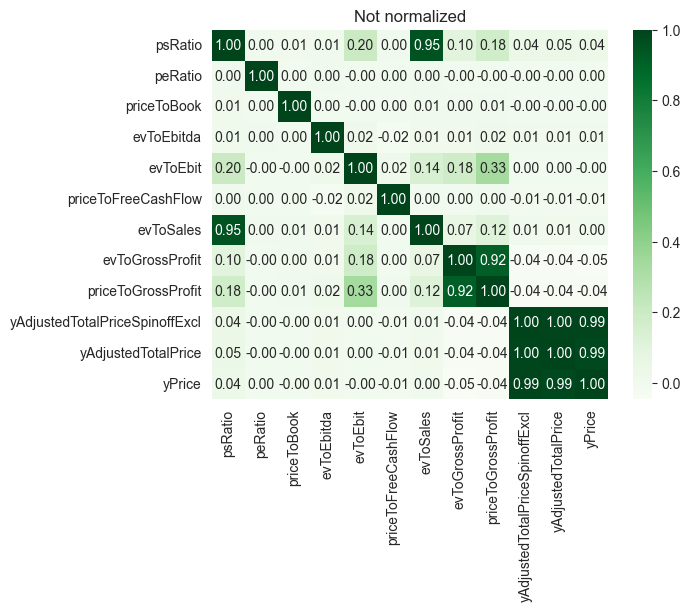

In [33]:
matrix = df[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Not normalized absolute values")

Text(0.5, 1.0, 'Normalized')

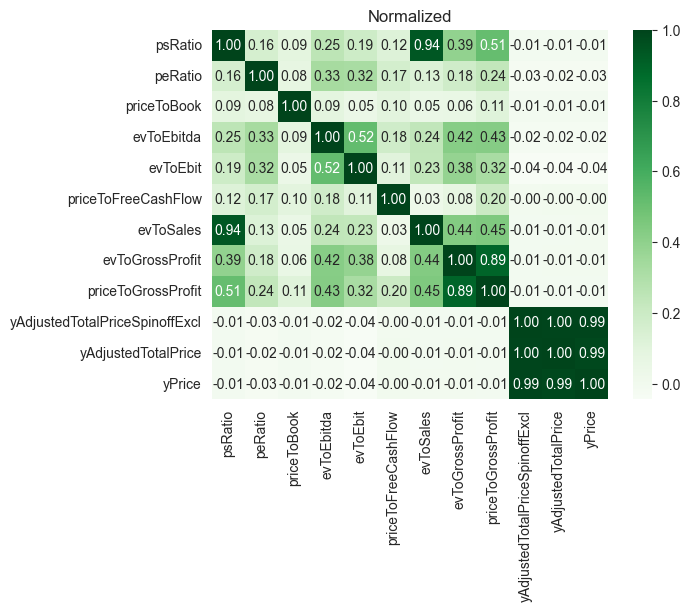

In [34]:
matrix = dfNorm.corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Normalized absolute values")

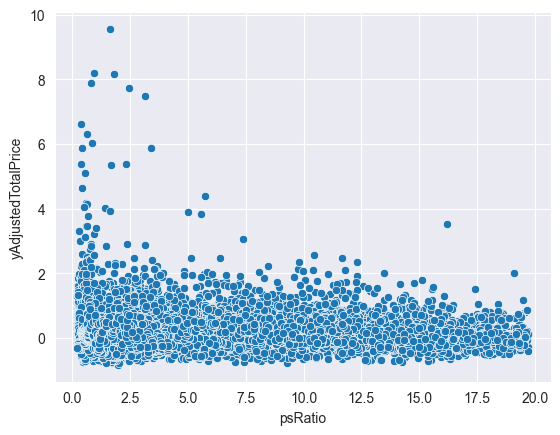

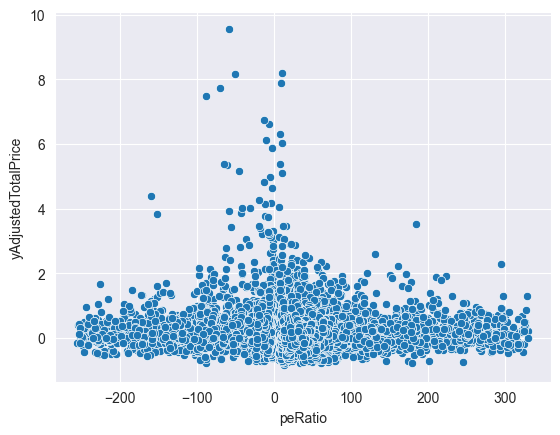

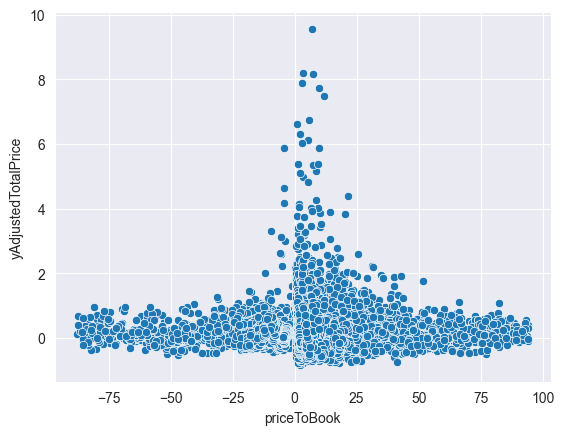

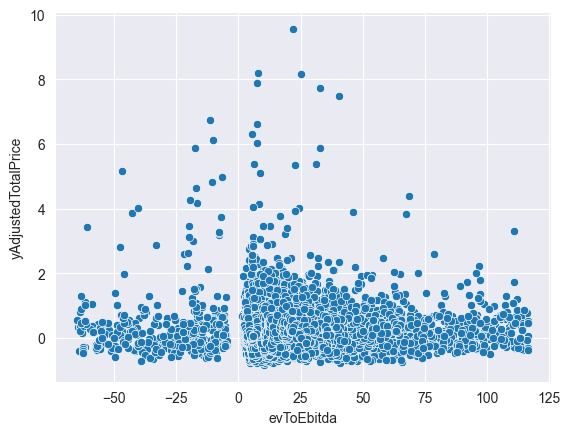

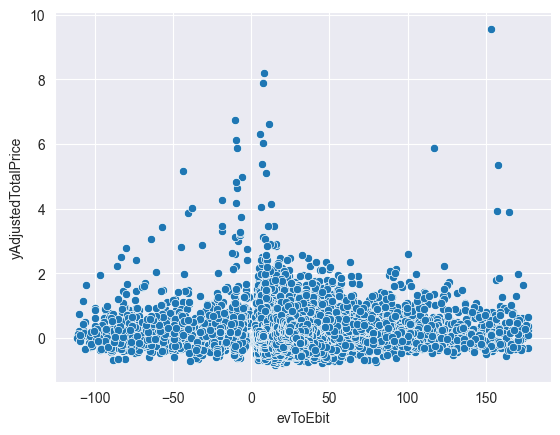

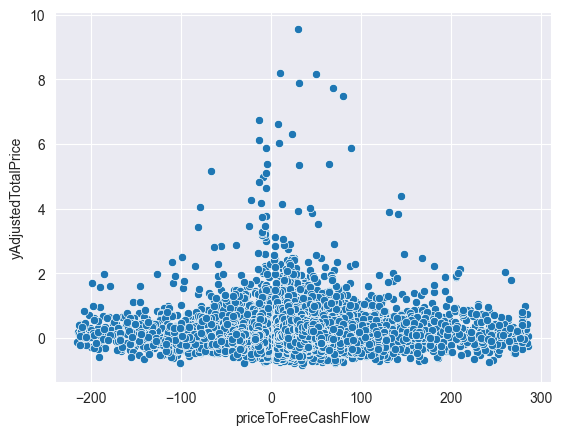

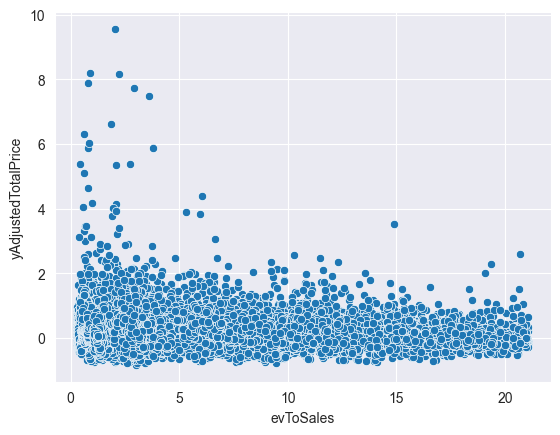

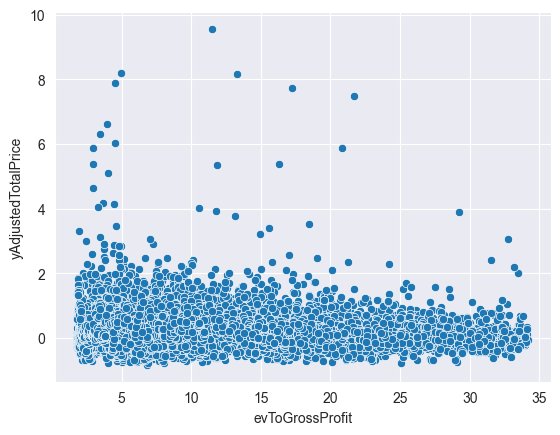

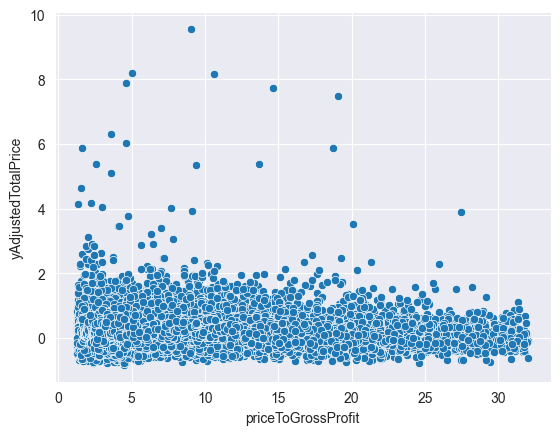

In [37]:

for i, key in enumerate(keys):
    med = statistics.median(df[key])
    mean = statistics.mean(df[key])
    # print("key: {}, median: {}, mean: {}".format(key, med, round(mean, 2)))
    
    # TODO: outliers from returns too
    q_low = df[key].quantile(0.01)
    q_hi  = df[key].quantile(0.99)
    
    df_filtered = df[(df[key] < q_hi) & (df[key] > q_low)]
    sns.scatterplot(data=df_filtered, x=key, y='yAdjustedTotalPrice')
    plt.show()
